In [277]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [278]:
from tqdm import tqdm
import matplotlib.pyplot as plt

import numpy as np
from dataset import Wave

from model import DAEModel
from loss import LeastSquaresError
from optim import GradientDescent

def train(loop=10000,wave_num=100):
    L = np.zeros(loop)
    
    training_data_num = 50
    test_data_num = 10
    
    training_wave = Wave(training_data_num,wave_num)
    test_wave = Wave(test_data_num,wave_num)
    
    tr_org, tr_nois = training_wave.generate()
    te_org, te_nois = test_wave.generate()
    
    model = DAEModel([wave_num,80,wave_num])
    loss_func = LeastSquaresError()
    optim = GradientDescent(model,training_data_num,wave_num)
    
    for i in tqdm(range(loop)):
        middles, outputs = model.forward(tr_nois)
        L[i] = loss_func.calc_loss(outputs,tr_org)
        if i % 500 == 0:
            test_middles, test_outputs = model.forward(te_nois)
            print(loss_func.calc_loss(test_outputs,te_org))            
        optim.update(tr_nois,middles,outputs,tr_org,10)
    
    return te_org, te_nois, test_outputs, L

In [279]:
te_org, te_nois, test_outputs, L = train(10000)

  0%|          | 2/10000 [00:00<09:52, 16.87it/s]

0.022709205539818908


  5%|▌         | 501/10000 [00:32<11:36, 13.65it/s]

0.018513178384732654


 10%|█         | 1001/10000 [01:12<12:08, 12.35it/s]

0.014626098956014345


 15%|█▌        | 1501/10000 [01:52<11:26, 12.39it/s]

0.006267059977035959


 20%|██        | 2001/10000 [02:34<11:22, 11.72it/s]

0.004542474818869721


 25%|██▌       | 2501/10000 [03:15<10:16, 12.17it/s]

0.0038321491876160425


 30%|███       | 3001/10000 [03:56<09:31, 12.24it/s]

0.0033496776838143117


 35%|███▌      | 3501/10000 [04:36<08:41, 12.46it/s]

0.0025916902899149026


 40%|████      | 4001/10000 [05:17<07:53, 12.68it/s]

0.0019155098557113019


 45%|████▌     | 4501/10000 [05:57<07:13, 12.68it/s]

0.001542841718260321


 50%|█████     | 5001/10000 [06:36<06:30, 12.80it/s]

0.0013285171013463087


 55%|█████▌    | 5501/10000 [07:15<05:54, 12.68it/s]

0.0011922189707115622


 60%|██████    | 6001/10000 [07:54<05:17, 12.60it/s]

0.001097389535414436


 65%|██████▌   | 6501/10000 [08:32<04:24, 13.25it/s]

0.0010154975330812091


 70%|███████   | 7001/10000 [09:10<03:59, 12.52it/s]

0.0009332722586884823


 75%|███████▌  | 7501/10000 [09:47<03:07, 13.32it/s]

0.0008506492202568036


 80%|████████  | 8001/10000 [10:25<02:35, 12.88it/s]

0.000773503306692334


 85%|████████▌ | 8501/10000 [11:03<01:54, 13.13it/s]

0.0007075955943593057


 90%|█████████ | 9001/10000 [11:41<01:16, 13.06it/s]

0.0006550483296703987


 95%|█████████▌| 9501/10000 [12:19<00:37, 13.43it/s]

0.0006146221236335775


100%|██████████| 10000/10000 [12:57<00:00, 12.86it/s]


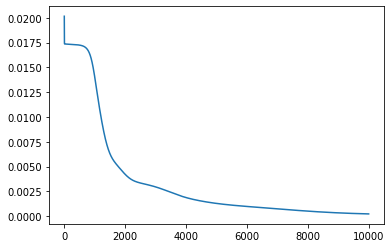

In [280]:
import matplotlib.pyplot as plt
plt.plot(L)

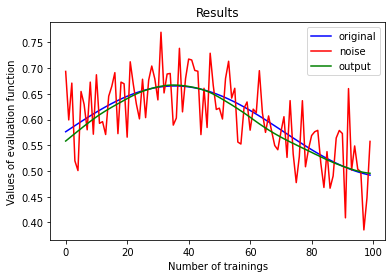

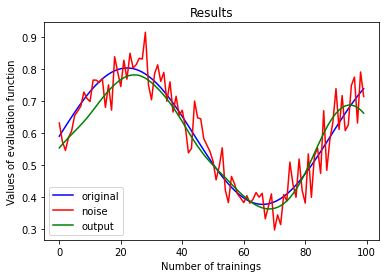

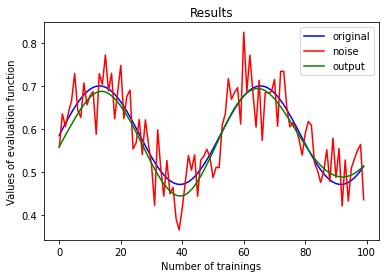

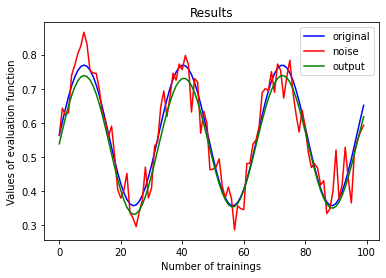

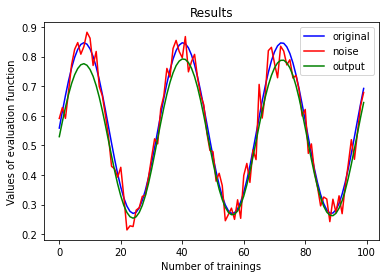

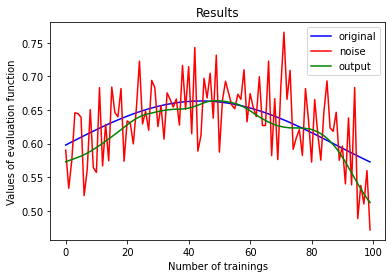

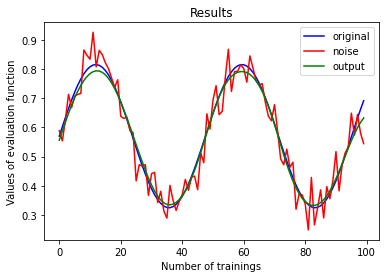

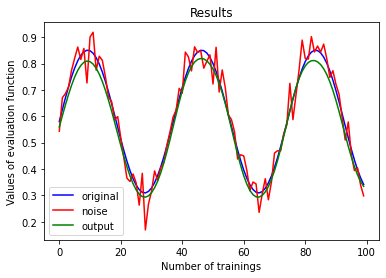

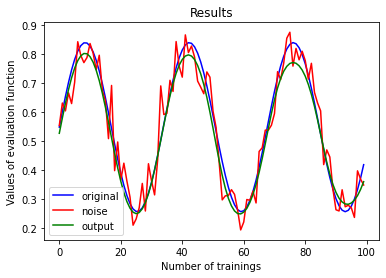

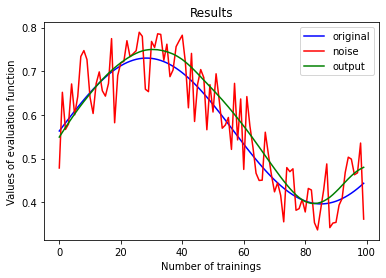

In [294]:
for num in range(len(te_org[0])):
    plt.figure()
    plt.plot(te_org[:,num],color="blue",label="original")
    plt.plot(te_nois[:,num],color="red",label="noise")
    plt.plot(test_outputs[:,num],color="green",label="output")
    plt.title('Results')
    plt.xlabel('Number of trainings')
    plt.ylabel('Values of evaluation function')
    plt.legend()
    plt.savefig('result/figure{}.png'.format(num))
    